In [1]:
import pandas

In [2]:
avocado = pandas.read_csv('../data/avocado.csv')

In [3]:
import seaborn

In [4]:
import matplotlib

In [5]:
%matplotlib inline

In [6]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany



* Some relevant columns in the dataset:
```
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
```

In [7]:
avocado = avocado.drop('Unnamed: 0', axis=1)

In [8]:
avocado['Date_datetime'] = avocado.Date.apply(pandas.to_datetime)

In [9]:
avocado.Date_datetime[:5]

0   2015-12-27
1   2015-12-20
2   2015-12-13
3   2015-12-06
4   2015-11-29
Name: Date_datetime, dtype: datetime64[ns]

In [10]:
matplotlib.rcParams['figure.figsize'] = (10, 8)   # Increases the Plot Size

In [11]:
seaborn.set_style('dark')

## 1. Price Trends

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


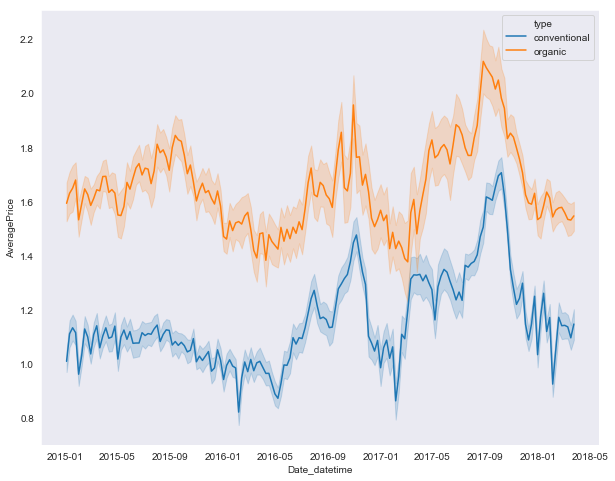

In [12]:
# Plot the average price trend, consider all the regions, chart will show the error band
seaborn.lineplot(x="Date_datetime", y="AveragePrice",
             hue="type",  palette="tab10",
             data=avocado)

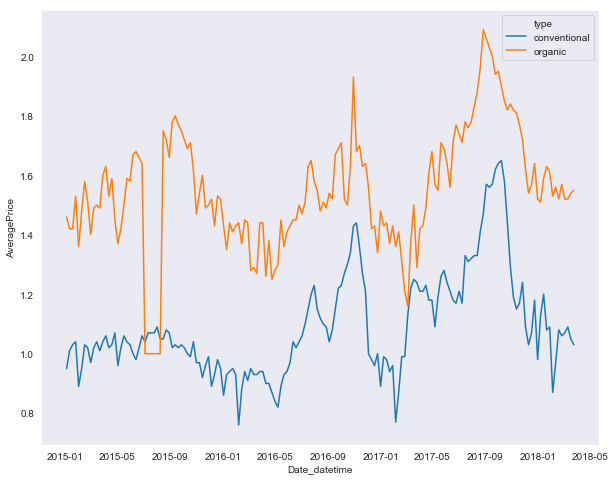

In [13]:
# Plot the national average price trend, chart will not show the error band

seaborn.lineplot(x="Date_datetime", y="AveragePrice",
             hue="type",  palette="tab10",
             data=avocado[:][avocado.region=='TotalUS'])

### (a). compare the price trends in different years

In [14]:
import datetime

In [15]:
datetime.date.isocalendar(avocado.Date_datetime[0])

(2015, 52, 7)

In [16]:
# get week number of the year  
avocado['Week']=avocado.Date_datetime.apply(lambda x: datetime.date.isocalendar(x)[1])

In [17]:
avocado.Week[:5]

0    52
1    51
2    50
3    49
4    48
Name: Week, dtype: int64

In [18]:
avocado['Month']=avocado.Date_datetime.apply(lambda x: x.month)

In [19]:
seaborn.set_style('darkgrid')

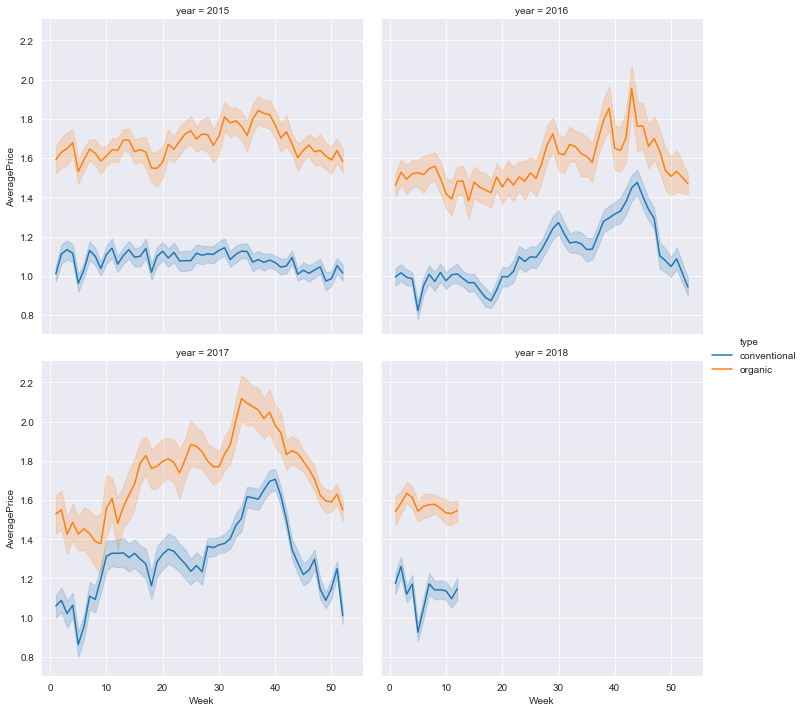

In [20]:
seaborn.relplot(x="Week", y="AveragePrice", 
                col="year", kind="line",hue="type",col_wrap=2,
             data=avocado)

### (b). Compare prices in different regions

In [21]:
# Split data into subsets of different regions
region_list = avocado.region.unique()
#region_dict = {elem : pandas.DataFrame() for elem in region_list}

region_dict ={}

for key in region_list:
    region_dict [key] = avocado[:][avocado.region == key]
    
region_dict["Philadelphia"][:3]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_datetime,Week,Month
1664,2015-12-27,1.25,308546.88,9778.07,208945.03,530.89,89292.89,82776.35,6513.36,3.18,conventional,2015,Philadelphia,2015-12-27,52,12
1665,2015-12-20,1.33,306843.13,9646.13,198361.80,532.68,98302.52,88587.50,9715.02,0.00,conventional,2015,Philadelphia,2015-12-20,51,12
1666,2015-12-13,1.18,352369.17,12500.24,244536.03,683.27,94649.63,87738.34,6908.05,3.24,conventional,2015,Philadelphia,2015-12-13,50,12


In [22]:
target_regions = avocado[:][avocado.region.str.contains("NewYork|Chicago|LosAngeles|Houston|MiamiFtLauderdale|")]

In [23]:
# statistics of prices for selected metro areas 
target_regions.groupby(['region','type'])['AveragePrice'].describe()

count      mean       std   min    25%  \
region              type                                                   
Albany              conventional  169.0  1.348757  0.212427  0.85  1.180   
                    organic       169.0  1.773314  0.187705  1.32  1.660   
Atlanta             conventional  169.0  1.068817  0.178378  0.68  0.960   
                    organic       169.0  1.607101  0.375059  0.62  1.380   
BaltimoreWashington conventional  169.0  1.344201  0.214916  0.95  1.160   
                    organic       169.0  1.724260  0.246995  1.15  1.560   
Boise               conventional  169.0  1.076036  0.246220  0.58  0.940   
                    organic       169.0  1.620237  0.459381  0.72  1.270   
Boston              conventional  169.0  1.304379  0.218697  0.85  1.120   
                    organic       169.0  1.757396  0.254664  1.13  1.590   
BuffaloRochester    conventional  169.0  1.382308  0.142528  1.04  1.300   
                    organic       169.0  1.651361  0.307038  1.03  1.490   
California          conventional  169.0  1.105444  0.229627  0.67  0.940   
                    organic       169.0  1.685207  0.290111  1.10  1.480   
Charlotte           conventional  169.0  1.275089  0.197270  0.80  1.150   
                    organic       169.0  1.936982  0.292163  1.08  1.750   
Chicago             conventional  169.0  1.369349  0.322930  0.70  1.130   
                    organic       169.0  1.744201  0.225277  1.08  1.600   
CincinnatiDayton    conventional  169.0  1.015503  0.233964  0.60  0.880   
                    organic       169.0  1.402899  0.342585  0.44  1.220   
Columbus            conventional  169.0  1.066272  0.195746  0.69  0.970   
                    organic       169.0  1.439290  0.303130  0.52  1.280   
DallasFtWorth       conventional  169.0  0.846450  0.136871  0.65  0.750   
                    organic       169.0  1.324734  0.204095  0.86  1.160   
Denver              conventional  169.0  1.073964  0.196945  0.60  0.950   
                    organic       169.0  1.363195  0.349110  0.66  1.100   
Detroit             conventional  169.0  1.123964  0.222754  0.65  0.990   
                    organic       169.0  1.428225  0.326920  0.48  1.260   
GrandRapids         conventional  169.0  1.325030  0.316467  0.77  1.070   
                    organic       169.0  1.684970  0.329486  1.01  1.400   
...                                 ...       ...       ...   ...    ...   
Roanoke             conventional  169.0  1.096036  0.148842  0.81  1.000   
                    organic       169.0  1.399822  0.300074  0.70  1.190   
Sacramento          conventional  169.0  1.273964  0.217015  0.86  1.130   
                    organic       169.0  1.969172  0.327546  1.13  1.720   
SanDiego            conventional  169.0  1.061479  0.248612  0.61  0.890   
                    organic       169.0  1.734852  0.357859  1.05  1.460   
SanFrancisco        conventional  169.0  1.397160  0.288737  0.84  1.210   
                    organic       169.0  2.211243  0.473798  1.06  1.950   
Seattle             conventional  169.0  1.169763  0.270575  0.75  0.980   
                    organic       169.0  1.715385  0.474803  0.70  1.410   
SouthCarolina       conventional  169.0  1.146213  0.170914  0.69  1.040   
                    organic       169.0  1.660355  0.238629  0.99  1.460   
SouthCentral        conventional  169.0  0.869408  0.139888  0.62  0.780   
                    organic       169.0  1.333077  0.194196  0.97  1.170   
Southeast           conventional  169.0  1.163018  0.207734  0.62  1.000   
                    organic       169.0  1.633018  0.227337  1.11  1.460   
Spokane             conventional  169.0  1.115976  0.218538  0.74  0.980   
                    organic       169.0  1.775207  0.455395  0.85  1.480   
StLouis             conventional  169.0  1.185740  0.218348  0.74  1.030   
                    organic       169.0  1.675503  0.426814  0.58  1.400   
Syracu

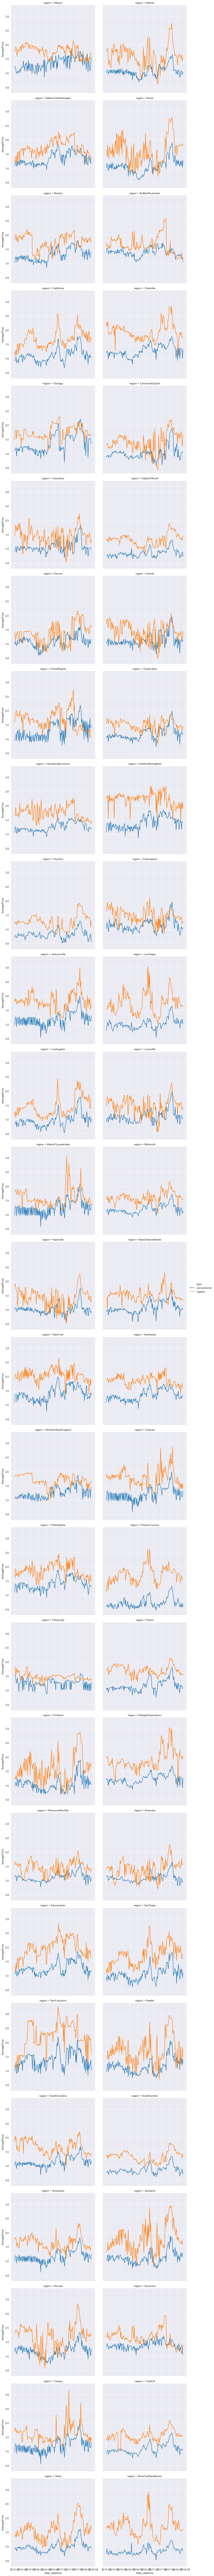

In [24]:
seaborn.relplot(x="Date_datetime", y="AveragePrice", 
                hue="type", col_wrap=2,col="region", kind="line",
             data=target_regions)

**compare NewYork and LosAngeles**

In [25]:
NY_LA = target_regions[:][target_regions.region.str.contains("NewYork|LosAngeles")]

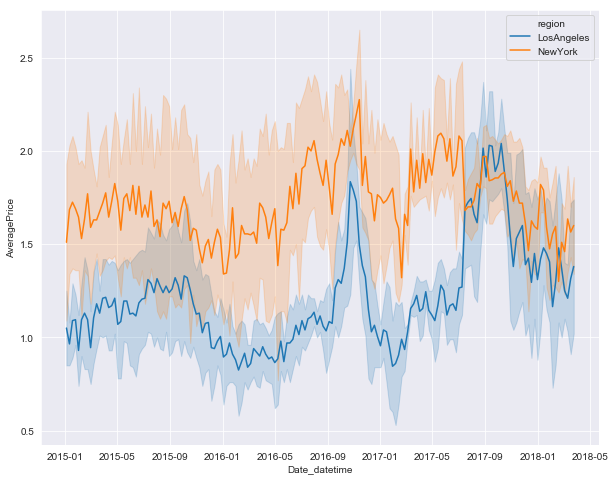

In [26]:
seaborn.lineplot(x='Date_datetime',  y='AveragePrice', 
                 palette='tab10', hue='region', #style='type',
                 data= NY_LA)

## 2. Volume Chart

In [27]:
national_total = avocado[:][avocado.region == 'TotalUS']

In [28]:
# base on the first two record, notice the sale ratio of organic vs. conventional is around 50
# which means, organic avocado sale is only 2% as conventional

### (a). weekly national sale trend

In [29]:
seaborn.set_style('whitegrid')

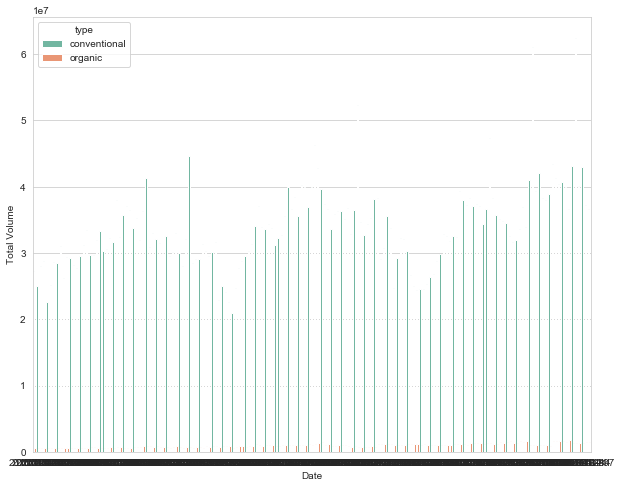

In [44]:
seaborn.barplot(x="Date", y="Total Volume",
             hue="type",  palette="Set2",#markers=["o", "x"],
             data=national_total)

### (b). weekly regional sale trend


In [31]:
regional_total = avocado[:][avocado.region != 'TotalUS']
regional_total[:3]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_datetime,Week,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12-27,52,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12-20,51,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12-13,50,12


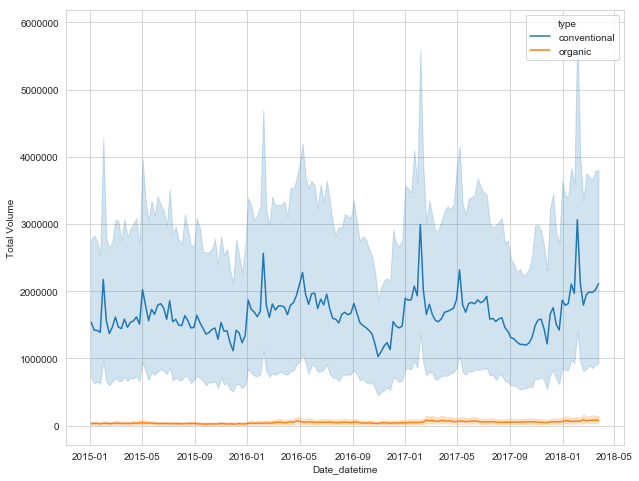

In [32]:
# regional sale trend, blue line shows the average 
seaborn.lineplot(x="Date_datetime", y="Total Volume",
             hue="type",  #palette="tab10",#style="year",
             data=avocado)

### (c). national monthly sale volume 

In [33]:
national_monthly_sale = national_total.groupby(['Month','year'])['Total Volume'].sum().reset_index()

In [34]:
national_monthly_sale[:4]

,Month,year,Total Volume
0,1,2015,1.204535e+08
1,1,2016,1.791182e+08
2,1,2017,2.014619e+08
3,1,2018,1.627295e+08


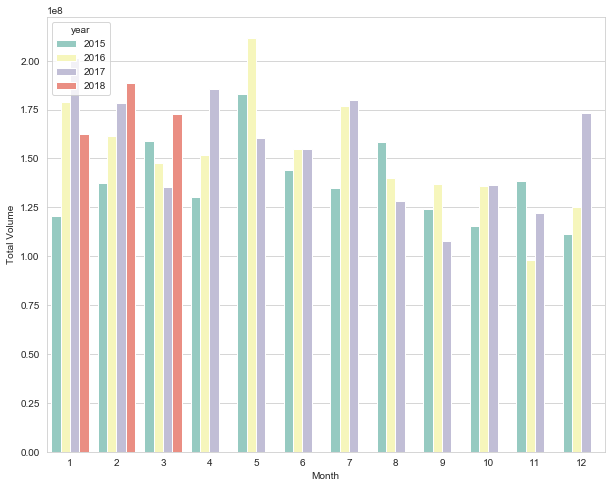

In [35]:
seaborn.barplot(x="Month", y="Total Volume",
             hue="year",  palette="Set3",#col="type", kind='bar',
             data=national_monthly_sale)

In [36]:
# Feb 2016 is the largest-sale month with over 200 million avocados

In [37]:
regional_monthly_sale = regional_total.groupby(['Month','year','region'])['Total Volume'].sum().reset_index()

In [38]:
regional_monthly_sale[:][regional_monthly_sale['Total Volume'] == regional_monthly_sale['Total Volume'].max()]

,Month,year,region,Total Volume
899,5,2016,West,39186978.62


In [39]:
target_regions_sale = regional_monthly_sale[:][regional_monthly_sale.region.\
                                          str.contains("NewYork|Chicago|LosAngeles|Houston|MiamiFtLauderdale|Philadelphia")]

In [40]:
# average monthly sale in each region
target_regions_sale.groupby('region')['Total Volume'].mean()

region
Chicago              3.428265e+06
Houston              5.209433e+06
LosAngeles           1.302299e+07
MiamiFtLauderdale    2.504442e+06
NewYork              6.172670e+06
Philadelphia         1.842020e+06
Name: Total Volume, dtype: float64

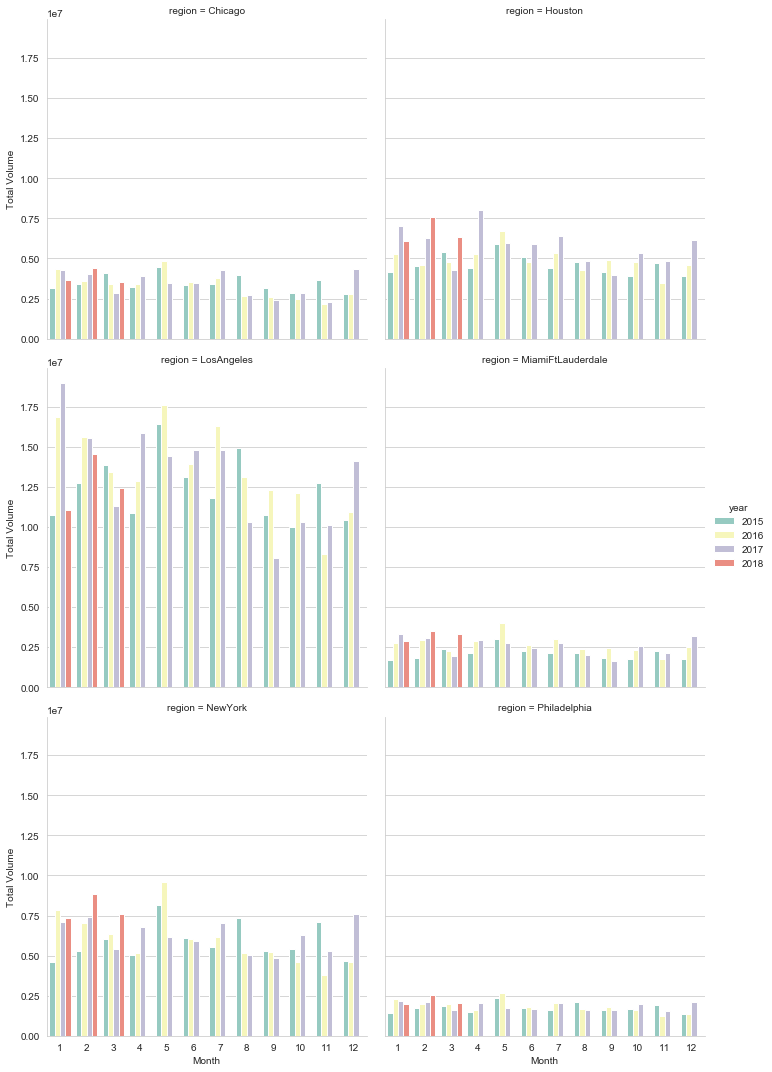

In [41]:
seaborn.catplot(x="Month", y="Total Volume",
             hue="year",  palette="Set3", col="region",col_wrap=2, kind='bar', 
             data=target_regions_sale)

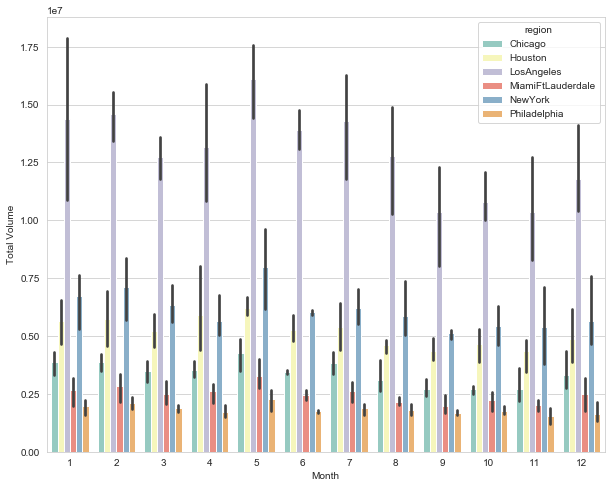

In [42]:
seaborn.barplot(x="Month", y="Total Volume",
             hue="region",  palette="Set3",#col="type", kind='bar',
             data=target_regions_sale)
